# Задачи к Лекции 2

__Исходные данные__

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("mlbootcamp5_train.csv",
                 sep=";",
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

<Axes: >

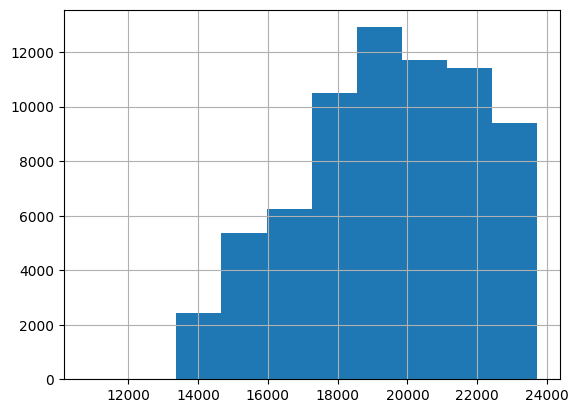

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
df['age'].hist()


In [ ]:
data = df
data = data[(data["age"] >= 16000) & (data["age"] <= 24000)]

<Axes: >

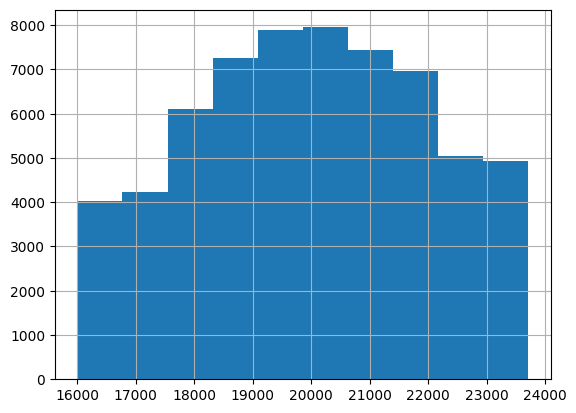

In [ ]:
data['age'].hist()

<Axes: >

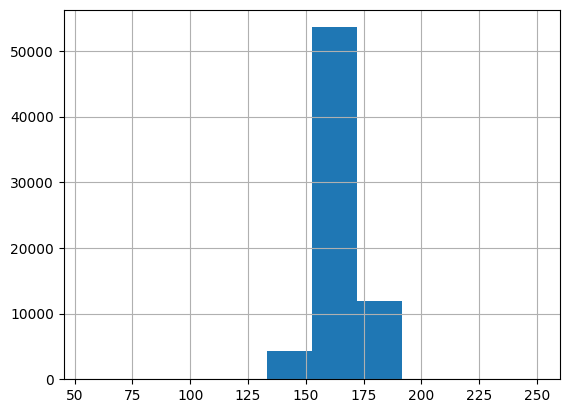

In [ ]:
df['height'].hist()


In [ ]:
data = data[(data["height"] >= 150) & (data["height"] <= 210)]

<Axes: >

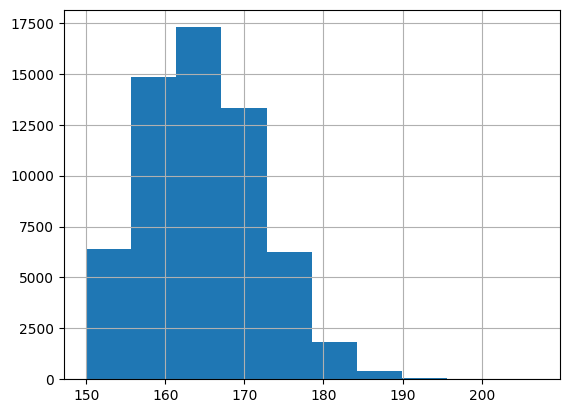

In [ ]:
data['height'].hist()

<Axes: >

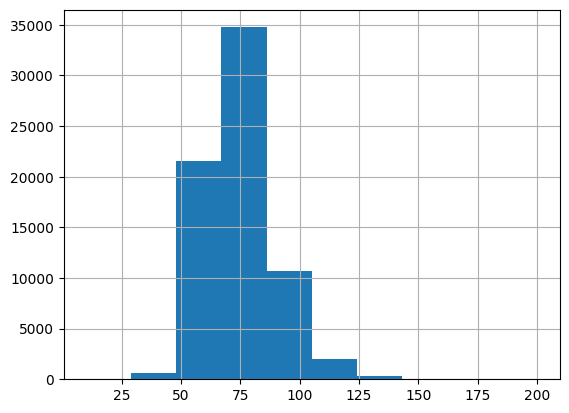

In [ ]:
df['weight'].hist()


<Axes: >

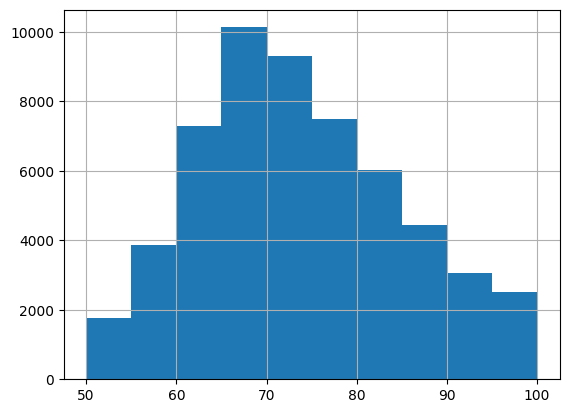

In [ ]:
data = data[(data["weight"] >= 50) & (data["weight"] <= 100)]
data['weight'].hist()

<Axes: >

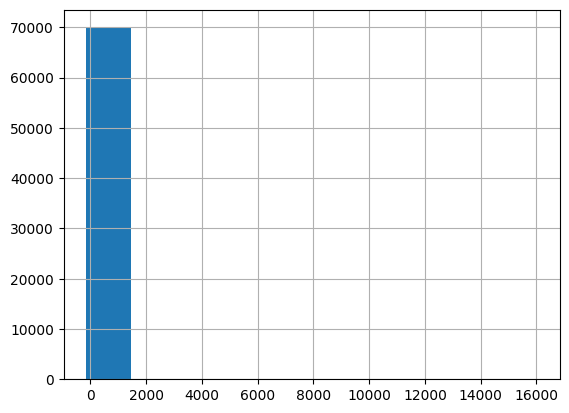

In [ ]:
df['ap_hi'].hist()

<Axes: >

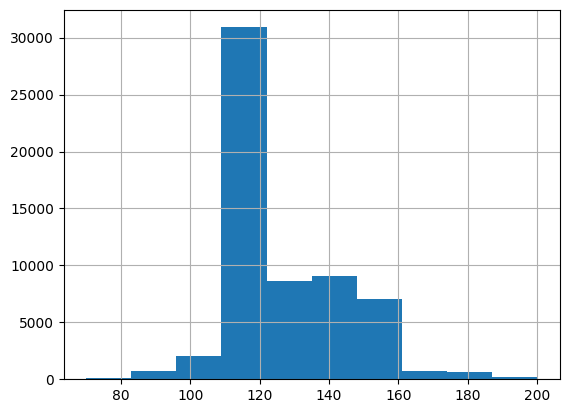

In [ ]:
data = data[(data["ap_hi"] >= 50) & (data["ap_hi"] <= 200)]
data['ap_hi'].hist()

<Axes: >

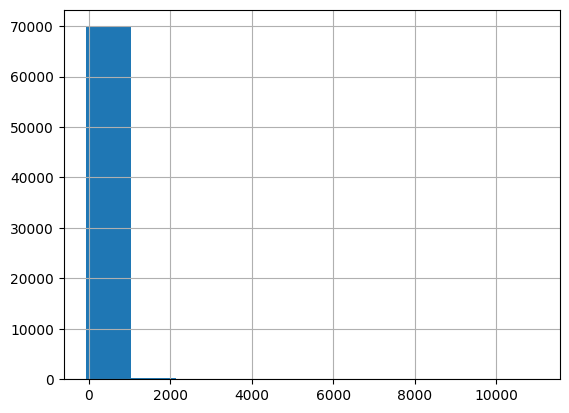

In [ ]:
df['ap_lo'].hist()

<Axes: >

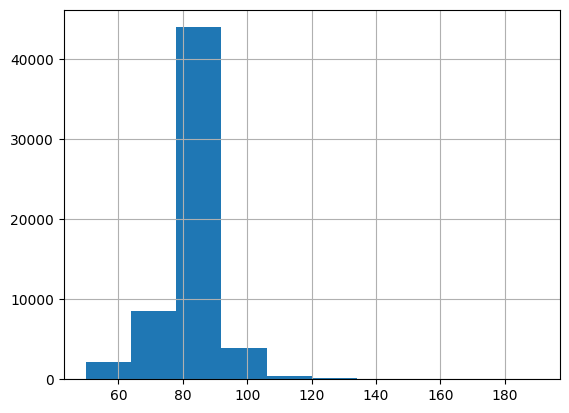

In [ ]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data['ap_lo'].hist()

In [48]:
#После того как данные проверены и подправлены можно приступать к классификатору
X = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
y = data['cardio']
Xq_train, Xq_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Создаем и обучаем модель Гауссовского наивного Байеса
gnb = GaussianNB()  # Для непрерывных признаков лучше всего подходит гауссова версия
gnb.fit(Xq_train, y_train)

GaussianNB()

In [50]:
y_pred = gnb.predict(Xq_test)

In [51]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

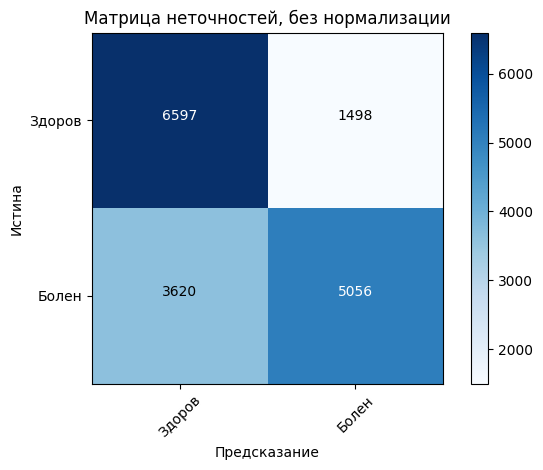

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Матрица неточностей, без нормализации')
plt.show()

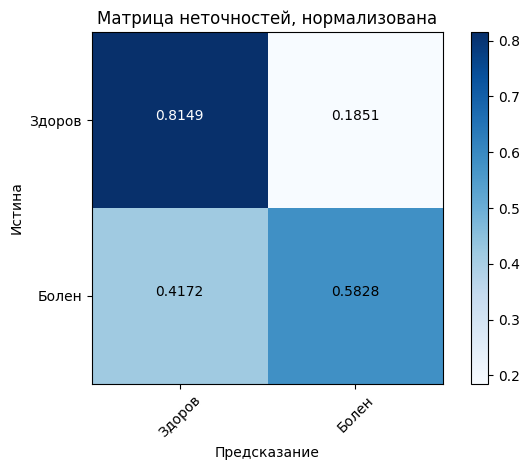

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Классификатор слишком часто записывает больных в здоровых, что недопустимо для медицинских целей, он работает хуже, чем на паре, вероятно некоторые значения не связаны с заболеванием и лишь "путают" классификатор

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
X = data[['cholesterol', 'gluc']]
Xc_train, Xc_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
mb = MultinomialNB()
mb.fit(Xc_train, y_train)

MultinomialNB()

In [55]:
mb_pred = mb.predict(Xc_test)

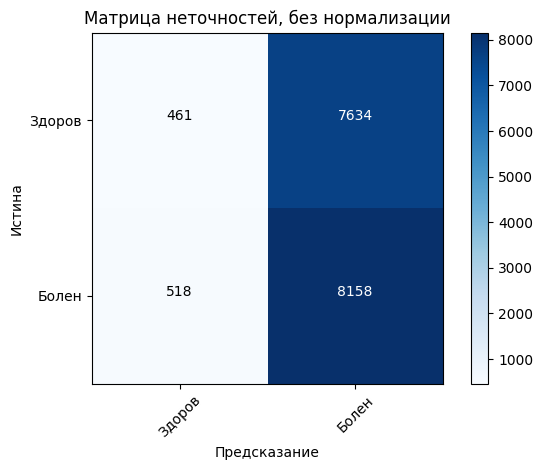

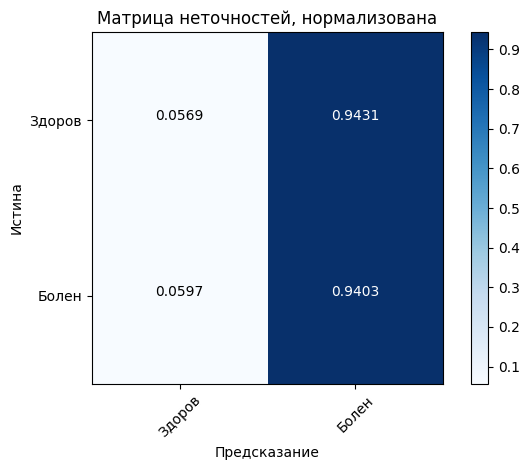

In [56]:
cnf_matrix = confusion_matrix(y_test, mb_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Матрица неточностей, без нормализации')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Так как пользоваться библиотекой при жедании можно, я ей вспользовалась. Классификатор записывает всех в больных, что-то явно не подходит как признак болезни

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

In [63]:
y = data['cardio']
binary_features = ['gender', 'smoke', 'alco', 'active']
X_bin = data[binary_features]
Xb_train, Xb_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42)


In [66]:
bern = BernoulliNB()
bern.fit(Xb_train, y_train)

BernoulliNB()

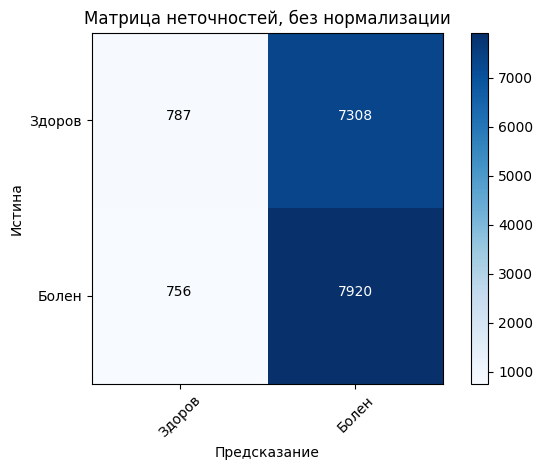

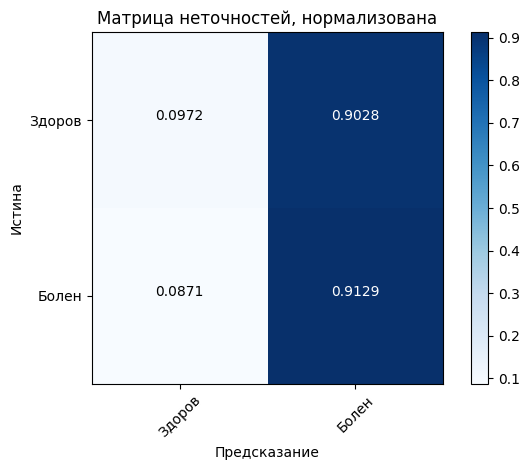

In [67]:
bern_pred = bern.predict(Xb_test)
cnf_matrix = confusion_matrix(y_test, bern_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Матрица неточностей, без нормализации')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

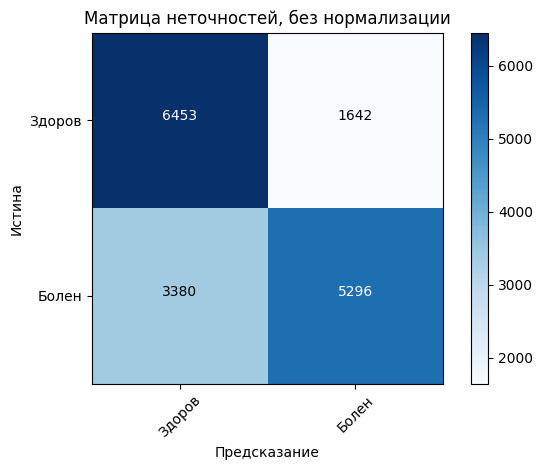

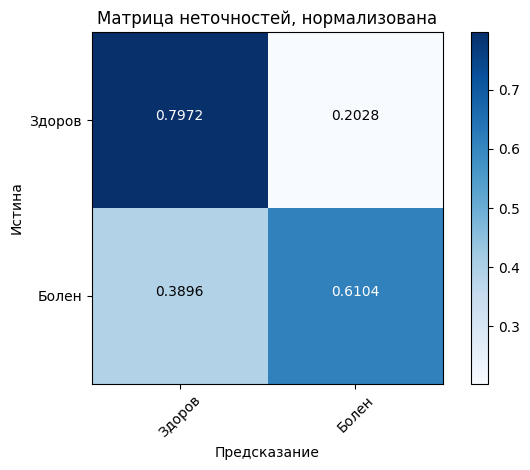

In [72]:
# Для каждого классификатора получим вероятности классов для теста
y_proba_gnb = gnb.predict_proba(Xq_test)
y_proba_mb = mb.predict_proba(Xc_test)
y_proba_bnb = bern.predict_proba(Xb_test)

# Объединяем вероятности (усреднение)
y_proba_combined = (y_proba_gnb + y_proba_mb + y_proba_bnb) / 3

# Предсказания объединенного классификатора
y_pred_combined = np.argmax(y_proba_combined, axis=1)

cnf_matrix = confusion_matrix(y_test, y_pred_combined)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Матрица неточностей, без нормализации')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()


**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [ ]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.